In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clip-interrogator-wheels-x/nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl
/kaggle/input/clip-interrogator-wheels-x/idna-3.4-py3-none-any.whl
/kaggle/input/clip-interrogator-wheels-x/torchvision-0.14.1-cp37-cp37m-manylinux1_x86_64.whl
/kaggle/input/clip-interrogator-wheels-x/timm-0.4.12-py3-none-any.whl
/kaggle/input/clip-interrogator-wheels-x/tokenizers-0.10.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl
/kaggle/input/clip-interrogator-wheels-x/protobuf-3.20.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl
/kaggle/input/clip-interrogator-wheels-x/ftfy-6.1.1-py3-none-any.whl
/kaggle/input/clip-interrogator-wheels-x/zipp-3.13.0-py3-none-any.whl
/kaggle/input/clip-interrogator-wheels-x/filelock-3.9.0-py3-none-any.whl
/kaggle/input/clip-interrogator-wheels-x/tqdm-4.64.1-py2.py3-none-any.whl
/kaggle/input/clip-interrogator-wheels-x/pyparsing-3.0.9-py3-none-any.whl
/kaggle/input/clip-interrogator-wheels-x/j

In [ ]:
#wheels_path = "/kaggle/input/clip-interrogator-wheels-x"
#clip_interrogator_whl_path = f"{wheels_path}/clip_interrogator-0.4.3-py3-none-any.whl"

In [ ]:
#!pip install --no-index --find-links $wheels_path $clip_interrogator_whl_path -q

In [2]:
!pip install clip-interrogator==0.5.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 787.5/787.5 kB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 21.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.8 MB/s eta 0:00:00
  Created wheel for fairscale: filename=fairscale-0.4.4-py3-none-any.whl size=292830 sha256=64fb81889fb5a86e9fac3a890d196f86fb6e590dba53f80215eb6a8797f6addd
  Stored in directory: /root/.cache/pip/wheels/08/58/6f/56c57fa8315eb0bcf0287b580c850845be5f116359b809e9f1
Successfully built fairscale
  Attempting uninstall: timm
    Foun

In [4]:
import inspect
import importlib

from clip_interrogator import clip_interrogator

# Clip interrogator

* The CLIP Interrogator is a prompt engineering tool that combines OpenAI's CLIP and Salesforce's BLIP to optimize text prompts to match a given image.

* CLIP Interrogator uses OpenCLIP which supports many different pretrained CLIP models. For the best prompts for Stable Diffusion 2.0 uses ViT-H-14/laion2b_s32b_b79k.

In [13]:
blip_path = inspect.getfile(blip)

In [14]:

fin = open(blip_path, "rt")
data = fin.read()
data = data.replace(
    "BertTokenizer.from_pretrained('bert-base-uncased')", 
    "BertTokenizer.from_pretrained('/kaggle/input/clip-interrogator-models-x/bert-base-uncased')"
)
fin.close()

fin = open(blip_path, "wt")
fin.write(data)
fin.close()

In [5]:
clip_interrogator_path = inspect.getfile(clip_interrogator.Interrogator)
print(clip_interrogator_path)
fin = open(clip_interrogator_path, "rt")
data = fin.read()
data = data.replace(
    'open_clip.get_tokenizer(clip_model_name)', 
    'open_clip.get_tokenizer(config.clip_model_name.split("/", 2)[0])'
)
fin.close()

fin = open(clip_interrogator_path, "wt")
fin.write(data)
fin.close()

# reload module
importlib.reload(clip_interrogator)

/opt/conda/lib/python3.10/site-packages/clip_interrogator/clip_interrogator.py


<module 'clip_interrogator.clip_interrogator' from '/opt/conda/lib/python3.10/site-packages/clip_interrogator/clip_interrogator.py'>

In [6]:
import os
import sys
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd
import torch
import open_clip

from blip.models import blip

sys.path.append('/kaggle/input/sentence-transformers-222/sentence-transformers')
from sentence_transformers import SentenceTransformer, models

comp_path = Path('/kaggle/input/stable-diffusion-image-to-prompts/')

In [7]:
class CFG:
    device = "cuda"
    seed = 42
    embedding_length = 384
    sentence_model_path = "/kaggle/input/sentence-transformers-222/all-MiniLM-L6-v2"
    blip_model_path = "/kaggle/input/clip-interrogator-models-x/model_large_caption.pth"
    ci_clip_model_name = "ViT-H-14/laion2b_s32b_b79k"
    clip_model_name = "ViT-H-14"
    clip_model_path = "/kaggle/input/clip-interrogator-models-x/CLIP-ViT-H-14-laion2B-s32B-b79K/open_clip_pytorch_model.bin"
    cache_path = "/kaggle/input/vlomme-clip-iter"

In [8]:
df_submission = pd.read_csv(comp_path / 'sample_submission.csv', index_col='imgId_eId')
df_submission.head()

val
imgId_eId            
20057f34d_0  0.018848
20057f34d_1  0.030190
20057f34d_2  0.072792
20057f34d_3 -0.000673
20057f34d_4  0.016774

In [9]:
images = os.listdir(comp_path / 'images')
imgIds = [i.split('.')[0] for i in images]

eIds = list(range(CFG.embedding_length))

imgId_eId = [
    '_'.join(map(str, i)) for i in zip(
        np.repeat(imgIds, CFG.embedding_length),
        np.tile(range(CFG.embedding_length), len(imgIds))
    )
]

assert sorted(imgId_eId) == sorted(df_submission.index)

In [10]:
st_model = SentenceTransformer(CFG.sentence_model_path)

In [23]:
model_config = clip_interrogator.Config(clip_model_name=CFG.ci_clip_model_name)
model_config.cache_path = CFG.cache_path
model_config.blip_num_beams = 1

In [24]:
configs_path = os.path.join(os.path.dirname(os.path.dirname(blip_path)), 'configs')
med_config = os.path.join(configs_path, 'med_config.json')
blip_model = blip.blip_decoder(
    pretrained=CFG.blip_model_path,
    image_size=model_config.blip_image_eval_size, 
    vit=model_config.blip_model_type, 
    med_config=med_config
)
blip_model.eval()
blip_model = blip_model.to(model_config.device)
model_config.blip_model = blip_model

load checkpoint from /kaggle/input/clip-interrogator-models-x/model_large_caption.pth


In [25]:
clip_model = open_clip.create_model(CFG.clip_model_name, precision='fp16' if model_config.device == 'cuda' else 'fp32')
open_clip.load_checkpoint(clip_model, CFG.clip_model_path)
clip_model.to(model_config.device).eval()
model_config.clip_model = clip_model

In [26]:
clip_preprocess = open_clip.image_transform(
    clip_model.visual.image_size,
    is_train = False,
    mean = getattr(clip_model.visual, 'image_mean', None),
    std = getattr(clip_model.visual, 'image_std', None),
)
model_config.clip_preprocess = clip_preprocess

In [27]:
ci = clip_interrogator.Interrogator(model_config)

Loaded CLIP model and data in 0.43 seconds.


In [28]:
cos = torch.nn.CosineSimilarity(dim=1)

mediums_features_array = torch.stack([torch.from_numpy(t) for t in ci.mediums.embeds]).to(ci.device)
movements_features_array = torch.stack([torch.from_numpy(t) for t in ci.movements.embeds]).to(ci.device)
flavors_features_array = torch.stack([torch.from_numpy(t) for t in ci.flavors.embeds]).to(ci.device)

In [29]:
def interrogate(image: Image) -> str:
    caption = ci.generate_caption(image)
    image_features = ci.image_to_features(image)
    
    medium = [ci.mediums.labels[i] for i in cos(image_features, mediums_features_array).topk(1).indices][0]
    movement = [ci.movements.labels[i] for i in cos(image_features, movements_features_array).topk(1).indices][0]
    flaves = ", ".join([ci.flavors.labels[i] for i in cos(image_features, flavors_features_array).topk(3).indices])

    if caption.startswith(medium):
        prompt = f"{caption}, {movement}, {flaves}"
    else:
        prompt = f"{caption}, {medium}, {movement}, {flaves}"

    return clip_interrogator._truncate_to_fit(prompt, ci.tokenize)

In [30]:
prompts = []

images_path = "/kaggle/input/stable-diffusion-image-to-prompts/images/"
for image_name in images:
    img = Image.open(images_path + image_name).convert("RGB")

    generated = interrogate(img)
    
    prompts.append(generated)

In [31]:
def add_text_limiters(text: str) -> str:
    return " ".join([
        word + "\n" if i % 15 == 0 else word 
        for i, word in enumerate(text.split(" "), start=1)
    ])

def plot_image(image: np.ndarray, original_prompt: str, generated_prompt: str) -> None:
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.annotate(
        "Original prompt:\n" + add_text_limiters(original_prompt) + "\n\nGenerated prompt:\n" + add_text_limiters(generated_prompt), 
        xy=(1.05, 0.5), xycoords='axes fraction', ha='left', va='center', 
        fontsize=16, rotation=0, color="#104a6e"
    )

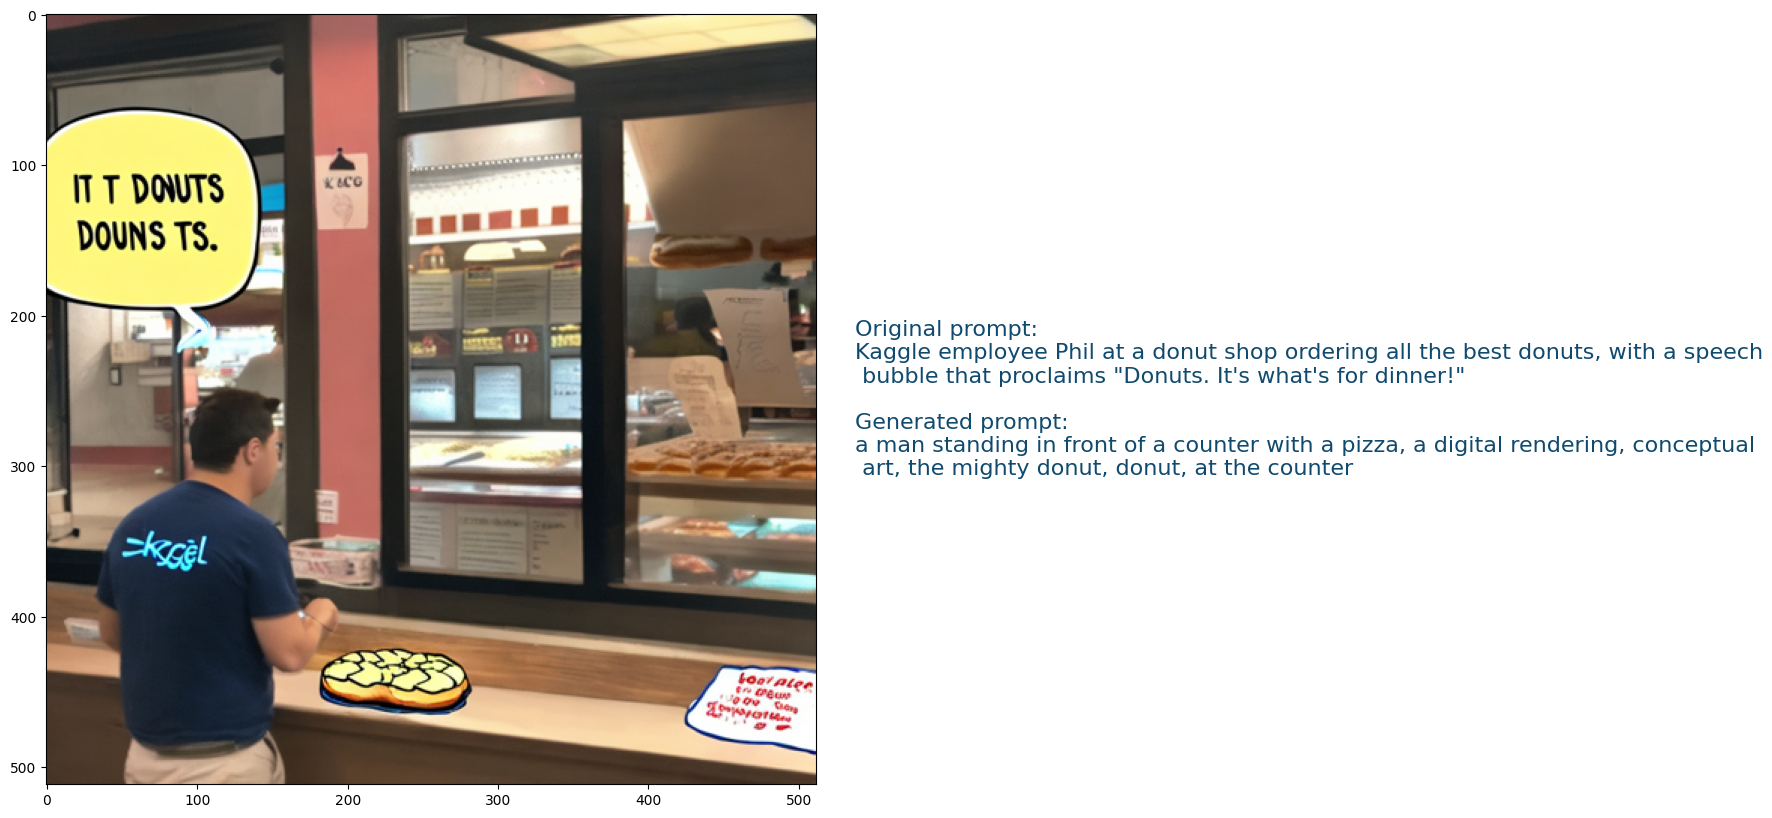

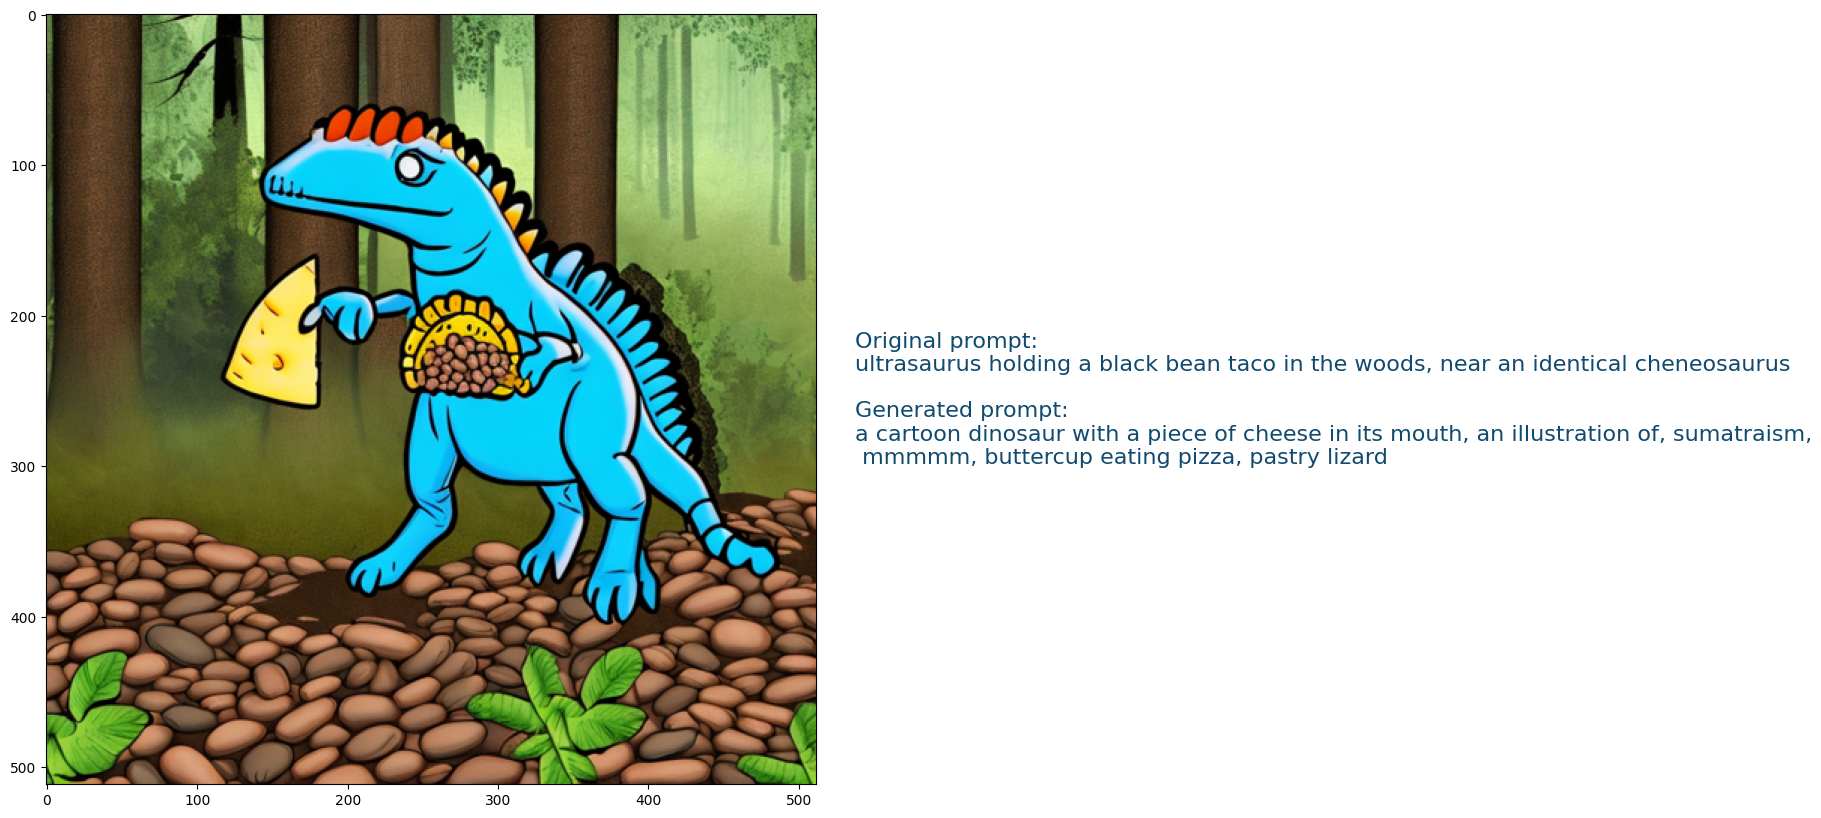

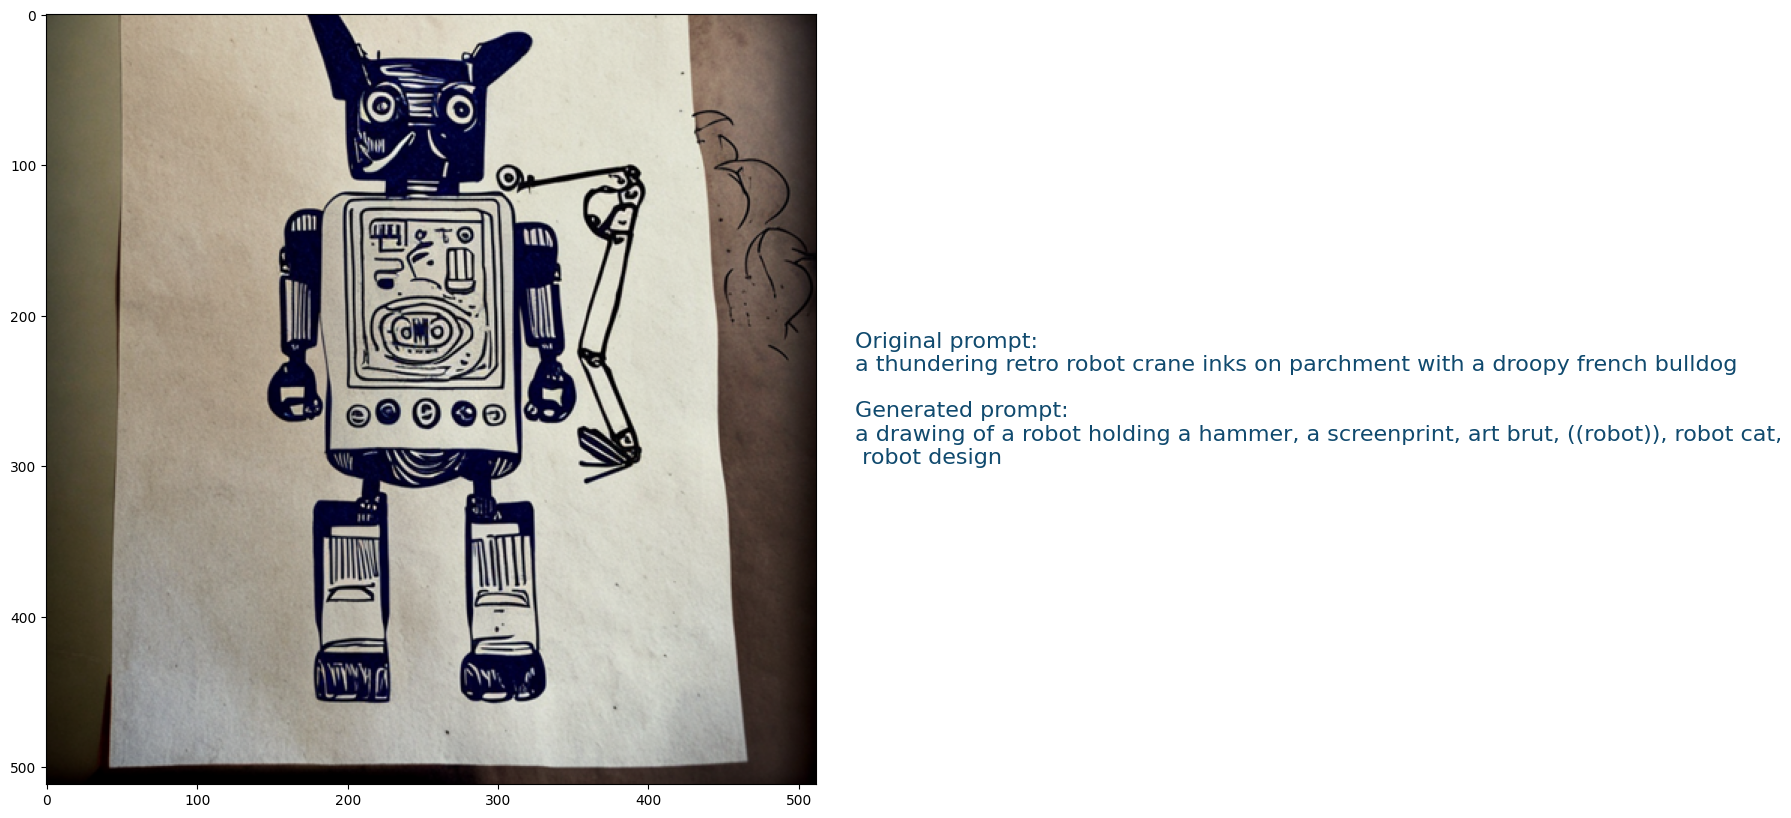

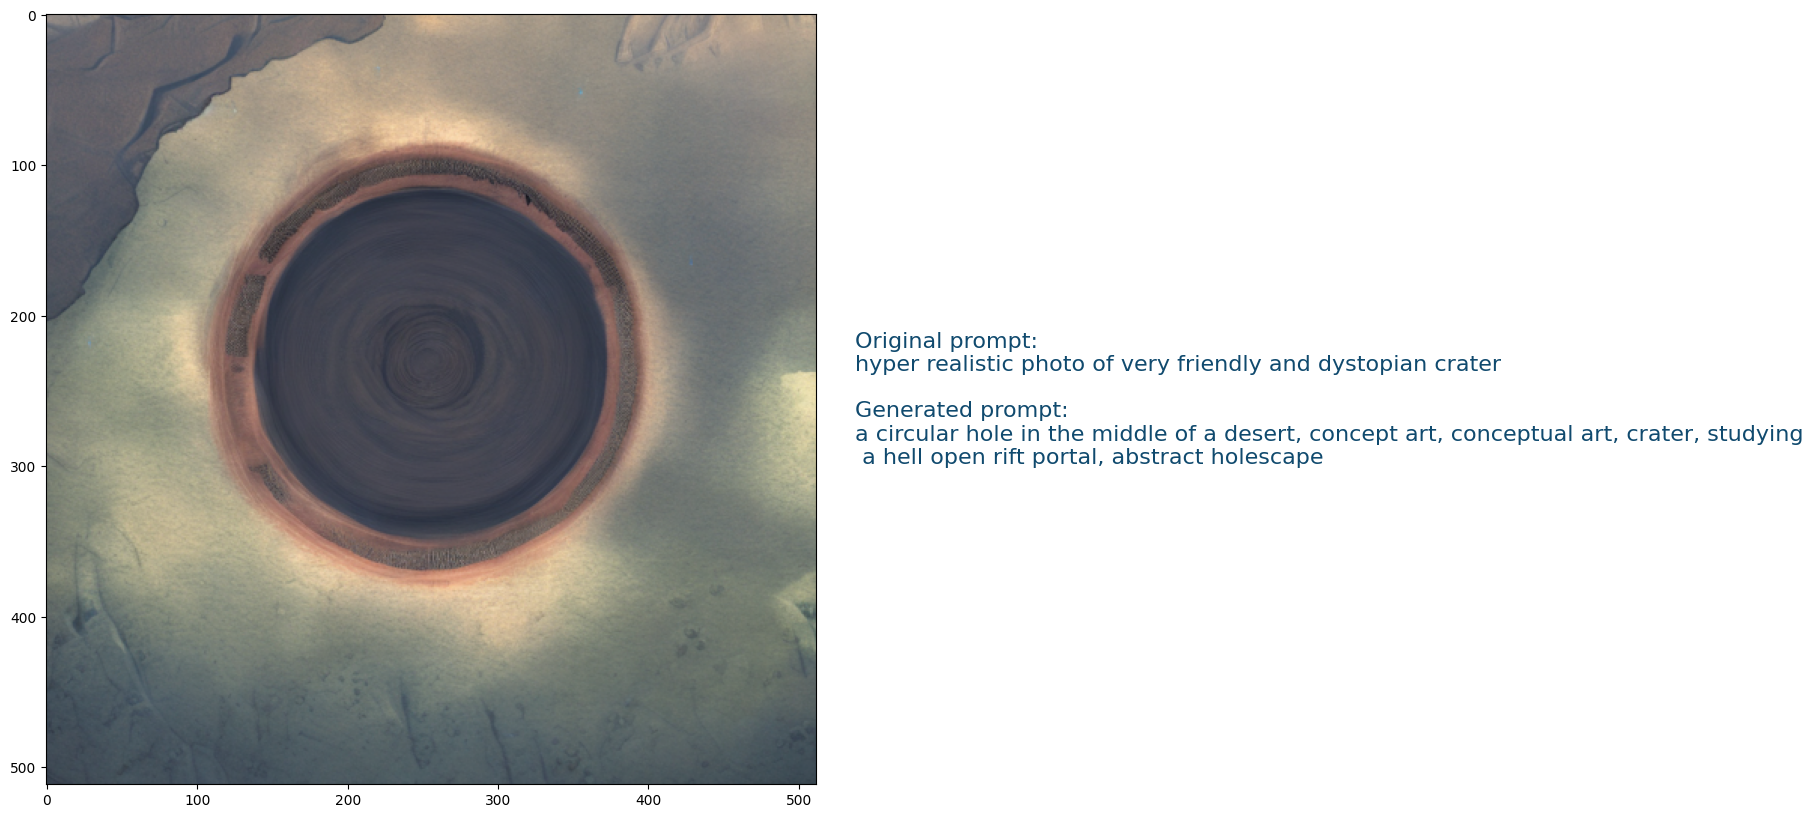

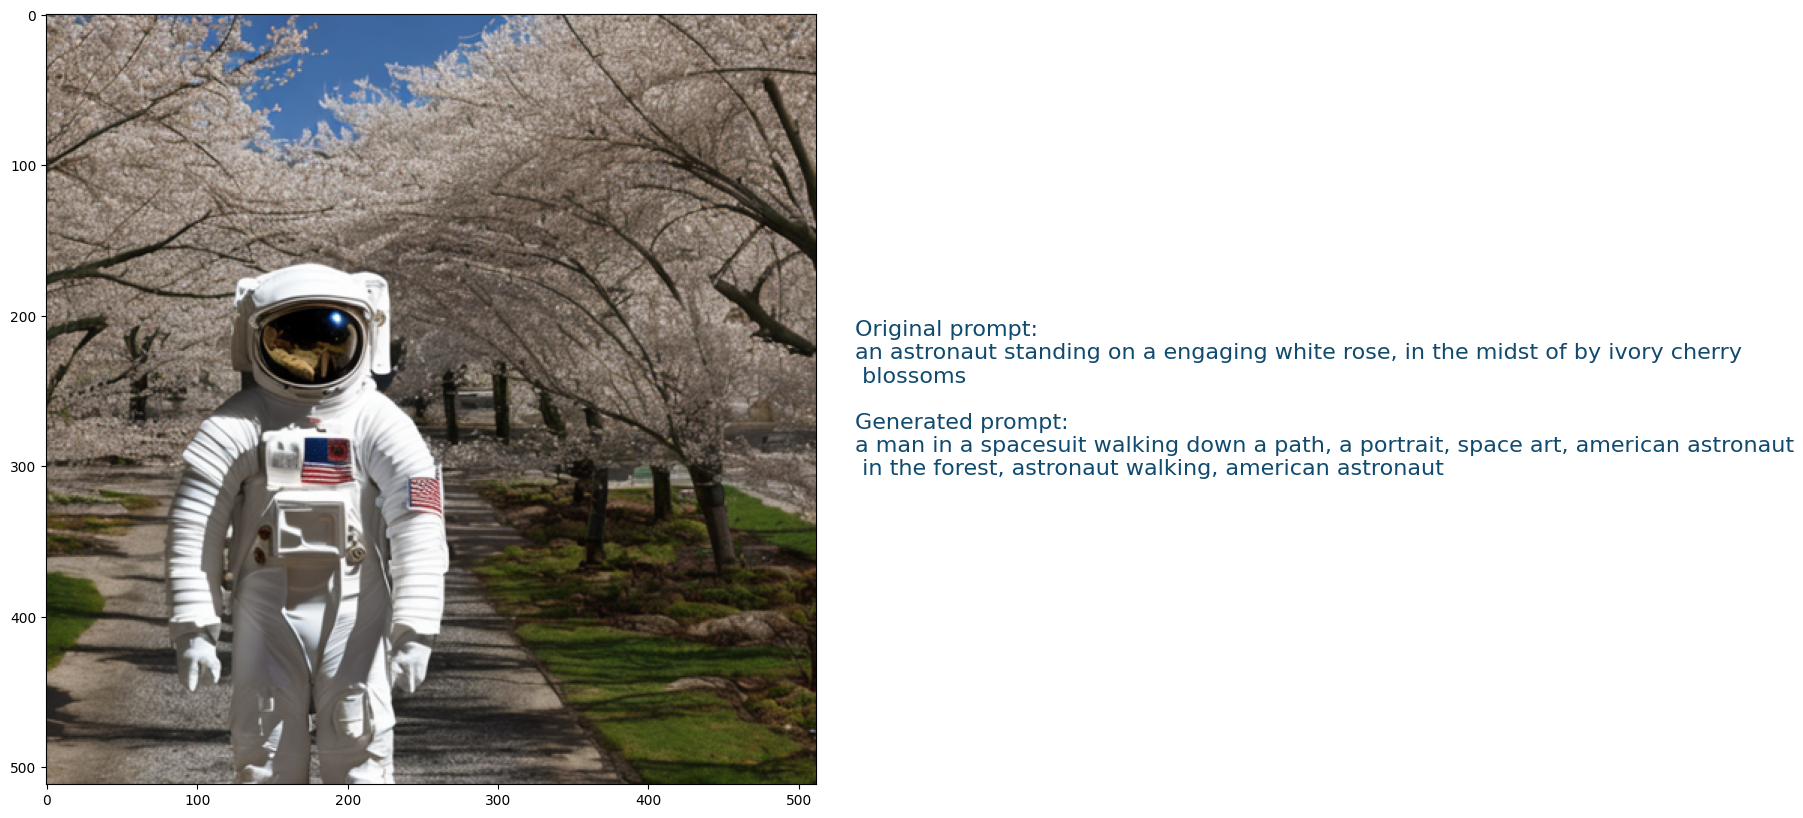

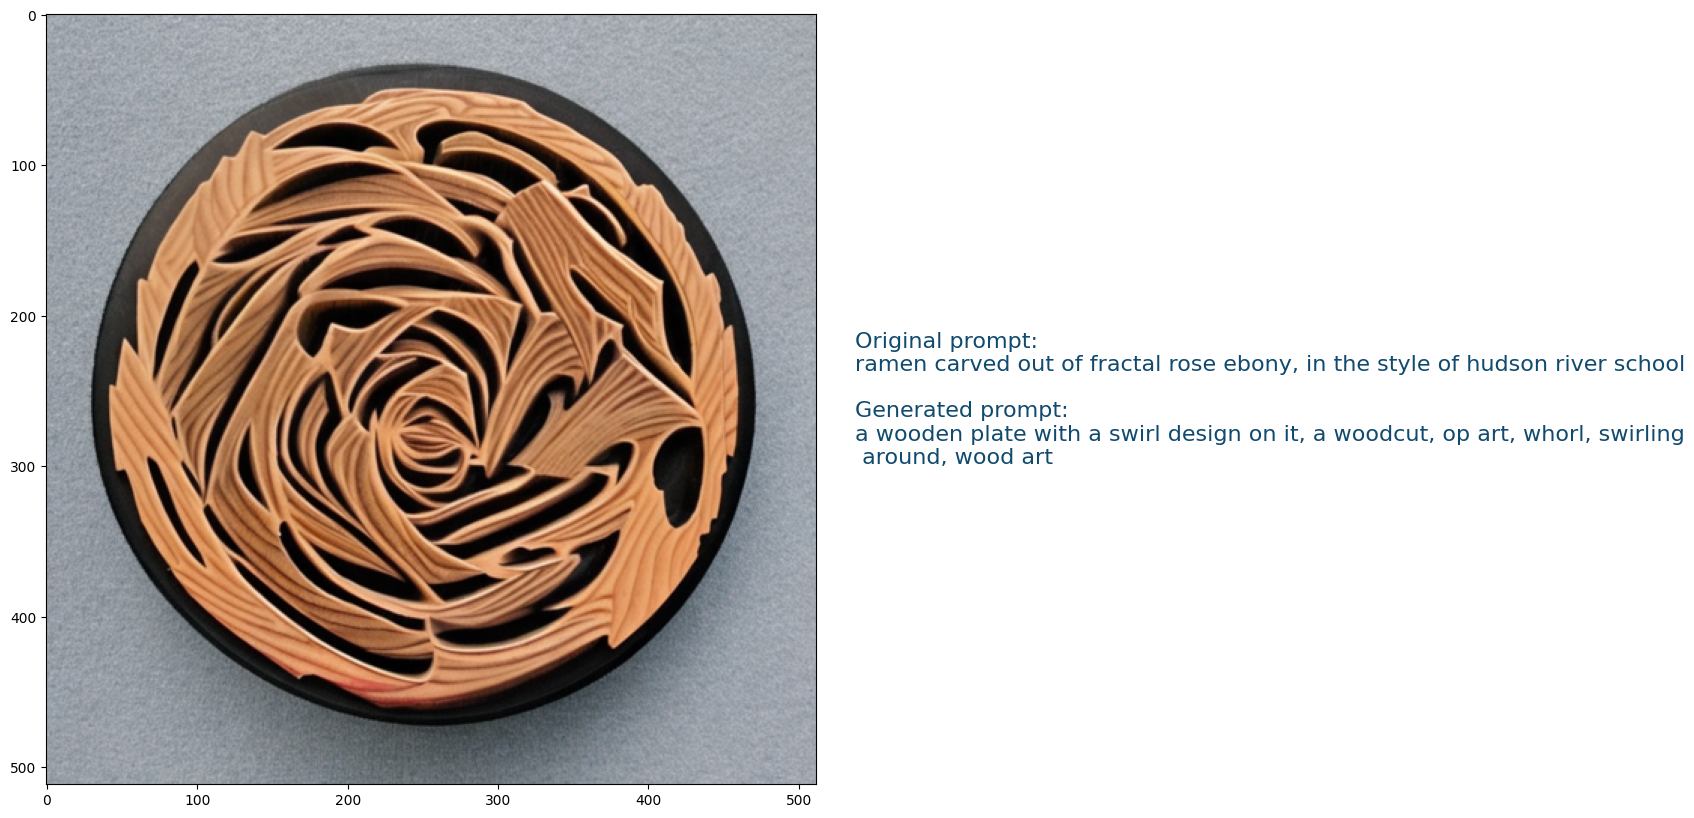

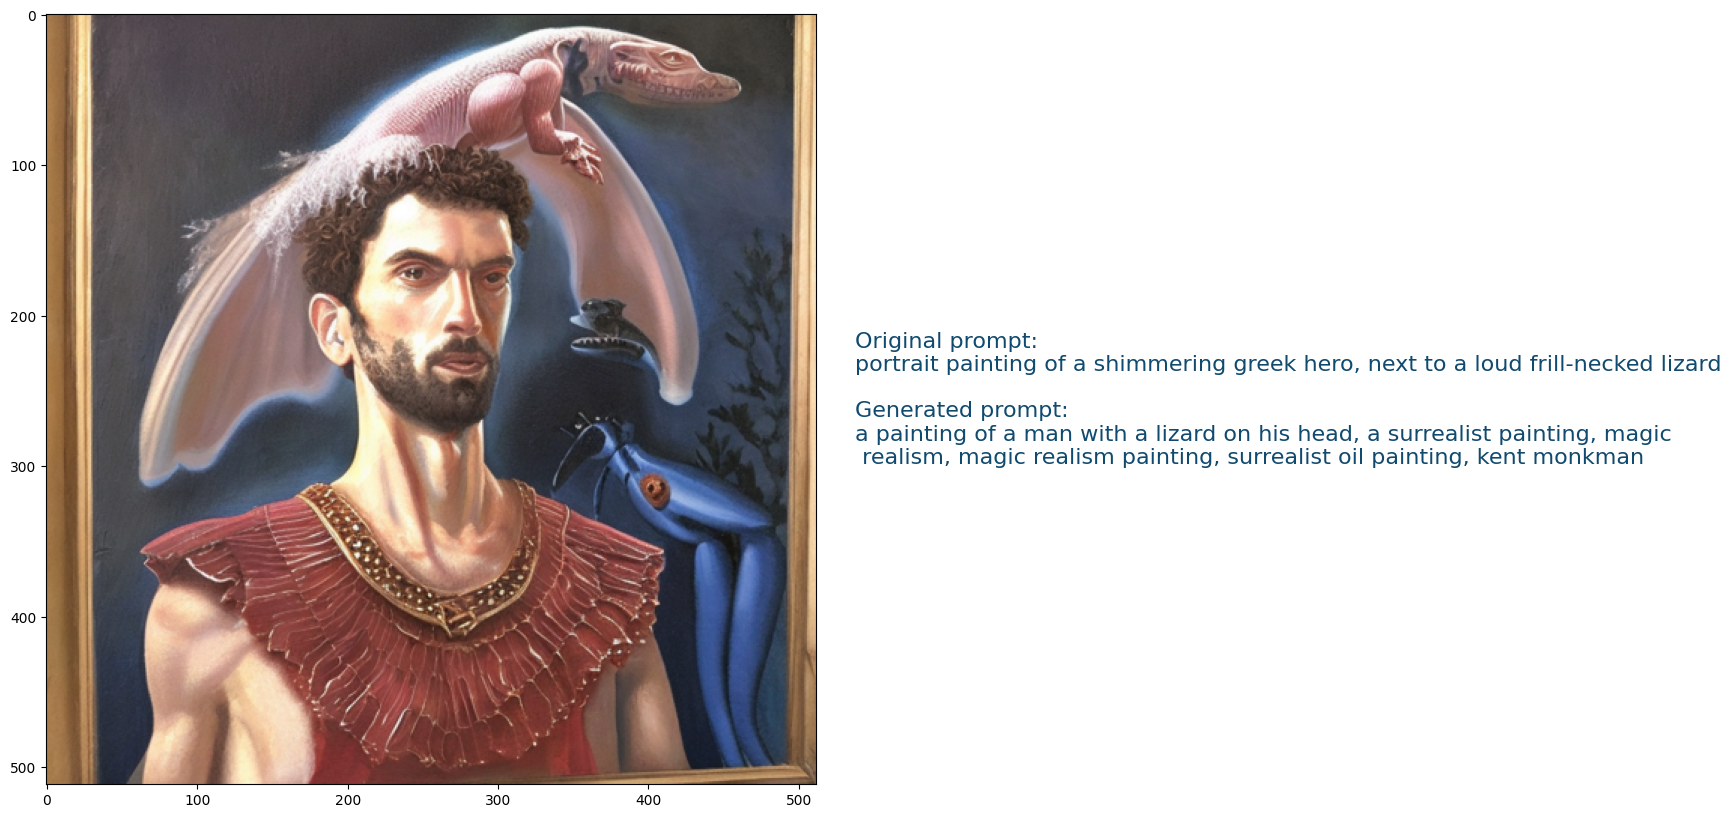

In [32]:
original_prompts_df = pd.read_csv("/kaggle/input/stable-diffusion-image-to-prompts/prompts.csv")

for image_name, prompt in zip(images, prompts):
    img = Image.open(images_path + image_name).convert("RGB")
    original_prompt = original_prompts_df[
        original_prompts_df.imgId == image_name.split(".")[0]
    ].prompt.iloc[0]
    plot_image(img, original_prompt, prompt)

In [33]:
prompt_embeddings = st_model.encode(prompts).flatten()

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
submission = pd.DataFrame(
    index=imgId_eId,
    data=prompt_embeddings,
    columns=['val']
).rename_axis('imgId_eId')

In [35]:
submission

val
imgId_eId              
f27825b2c_0   -0.014125
f27825b2c_1    0.072305
f27825b2c_2   -0.077266
f27825b2c_3   -0.031782
f27825b2c_4   -0.104096
...                 ...
c98f79f71_379 -0.046955
c98f79f71_380  0.022759
c98f79f71_381  0.054138
c98f79f71_382 -0.056510
c98f79f71_383  0.043704

[2688 rows x 1 columns]

In [36]:
del ci
del blip_model, clip_model
del st_model
torch.cuda.empty_cache()